In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('../input/heart-disease-prediction-using-logistic-regression/framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
data.size

67808

In [7]:
data=data.dropna()
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
data.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


In [9]:
print(data.groupby('TenYearCHD').size())

TenYearCHD
0    3099
1     557
dtype: int64


In [10]:
X=data[data.columns]
X=X.drop(columns=['TenYearCHD'])
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [11]:
Y=data['TenYearCHD']
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [12]:
from sklearn.feature_selection import SelectKBest,chi2
test=SelectKBest(score_func=chi2,k=10)
fit=test.fit(X,Y)
print(fit.scores_)

[ 17.12043013 295.50776101   7.67979651   0.68691311 156.56731824
  28.15300258   8.49782271  82.96718408  31.02798685 249.15307765
 669.50655224 142.87857382  15.73071703   2.91906232 379.58313716]


In [13]:
X.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [14]:
X=data[['age','cigsPerDay','totChol','sysBP','diaBP','glucose']]
X.head()

,age,cigsPerDay,totChol,sysBP,diaBP,glucose
0,39,0.0,195.0,106.0,70.0,77.0
1,46,0.0,250.0,121.0,81.0,76.0
2,48,20.0,245.0,127.5,80.0,70.0
3,61,30.0,225.0,150.0,95.0,103.0
4,46,23.0,285.0,130.0,84.0,85.0


In [15]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9737b0438>,
      dtype=object)

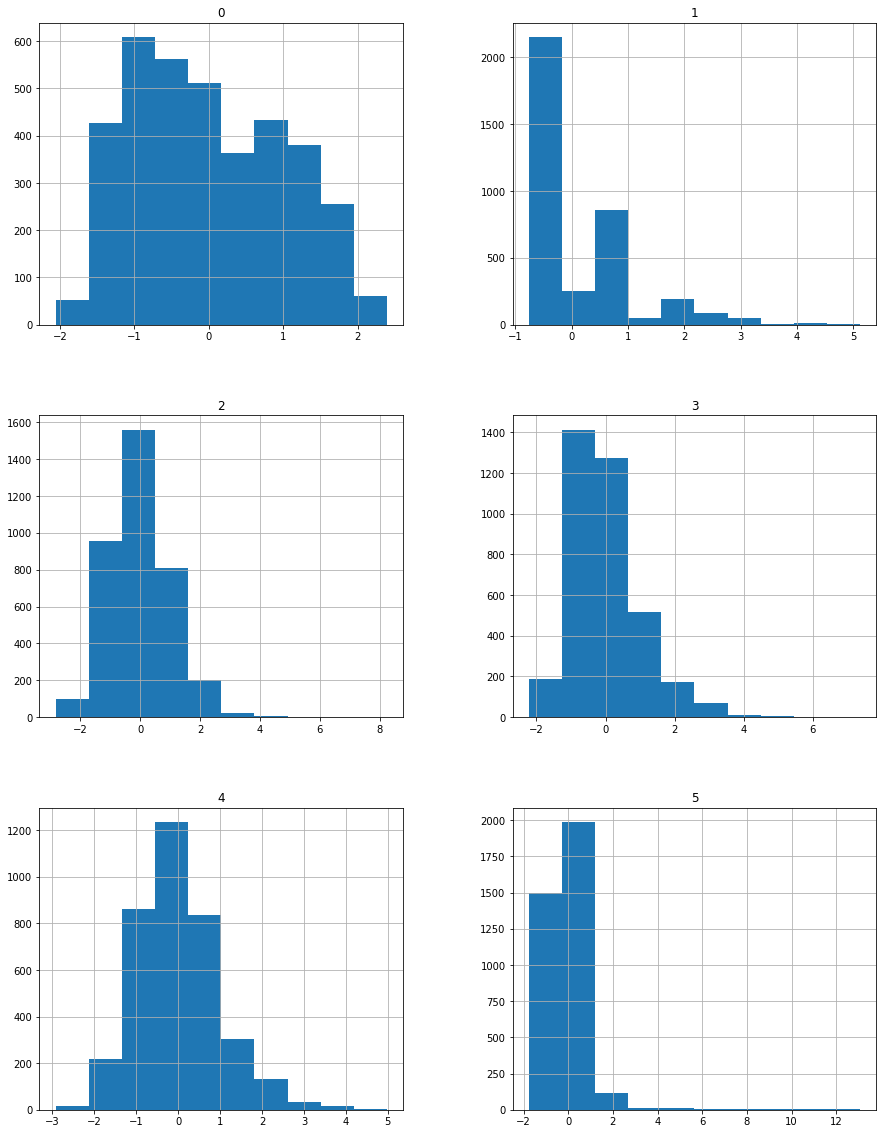

In [16]:
#histograms the dataset
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
pd.DataFrame(X).hist(ax = ax)

In [17]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('KN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVC',SVC()))

In [18]:
results=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_result=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    msg=("%s: %f (%f)" % (name,cv_result.mean(),cv_result.std()))
    print(msg)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.852300 (0.018316)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DT: 0.746436 (0.029051)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KN: 0.833702 (0.019560)
NB: 0.826862 (0.021174)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVC: 0.846826 (0.017596)


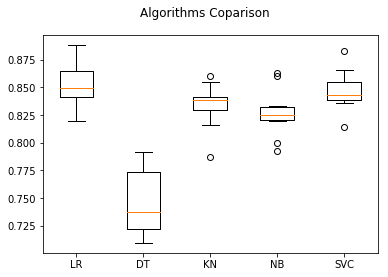

In [19]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle('Algorithms Coparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [21]:
my_model=LogisticRegression()
my_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
result=my_model.score(x_test,y_test)
print('Accuracy : ' ,(result*100))

Accuracy :  86.0655737704918
